Задание №1. Используя дискретный ряд распределения, полученный в лабораторной работе № 1, вычислить коэффициент линейной корреляции между возрастом преступника и частотой совершаемых преступлений.

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pandas as pd
from scipy import stats
from collections import Counter

with open('Москва_2021.txt', 'r') as file:
    ages = list(map(int, file.readlines()))
    
ages_frequency = Counter(ages) # возраст -> количество преступлений
ages_unique = ages_frequency.keys() # уникальные возраста
ages_frequency_only = ages_frequency.values()
xy = []
x2 = []
y2 = []
for x in ages_unique:
    xy.append(x*ages_frequency[x])
    x2.append(x**2)
    y2.append(ages_frequency[x]**2)


visual = pd.DataFrame({
    'Возраст(X)':ages_unique,
    'Частота преступлений(Y)': ages_frequency_only,
    'XY': xy,
    'X2': x2,
    'Y2': y2
})

print(f"Величина Возраст, количество уникальных значений - {len(ages_unique)}")
print(ages_unique)
print(f"Величина Частота преступлений, количество уникальных значений - {len(ages_frequency)}")
print(ages_frequency_only)
print(visual.sort_values(by='Возраст(X)'))

Величина Возраст, количество уникальных значений - 58
dict_keys([23, 32, 27, 26, 44, 49, 63, 34, 66, 38, 28, 35, 46, 62, 22, 31, 37, 18, 29, 30, 20, 69, 36, 25, 48, 40, 21, 45, 41, 24, 19, 67, 42, 33, 57, 47, 43, 55, 51, 39, 52, 56, 60, 64, 61, 16, 15, 58, 50, 53, 65, 59, 71, 14, 17, 70, 73, 54])
Величина Частота преступлений, количество уникальных значений - 58
dict_values([1071, 796, 1263, 980, 1032, 1060, 183, 869, 188, 1006, 1113, 676, 677, 139, 944, 1115, 522, 806, 1340, 734, 910, 202, 1198, 1050, 1026, 723, 716, 690, 837, 810, 971, 128, 978, 758, 136, 831, 820, 62, 188, 695, 193, 76, 266, 189, 226, 236, 53, 262, 150, 47, 79, 74, 85, 49, 126, 26, 17, 26])
    Возраст(X)  Частота преступлений(Y)     XY    X2       Y2
53          14                       49    686   196     2401
46          15                       53    795   225     2809
45          16                      236   3776   256    55696
54          17                      126   2142   289    15876
17          18       

In [3]:
mean_x = np.mean(list(ages_unique))
mean_y = np.mean(list(ages_frequency_only))
mean_xy = np.mean(xy)
print(f"Среднее значение возраста преступников: {mean_x}")
print(f"Среднее значение частоты преступлений: {mean_y}")
print(f"Среднее значение произведения частоты и возраста: {mean_xy}")
print(f"Верхняя часть формулы кэффициента линейной корреляции: {mean_xy - mean_x*mean_y}")

mean_x2 = np.mean(x2)
mean_y2 = np.mean(y2)

sko_x = (mean_x2-(mean_x)**2)**0.5
sko_y = (mean_y2-(mean_y)**2)**0.5

print(f"Среднее квадратическое отклонение для величины Возраст: {sko_x}")
print(f"Среднее квадратическое отклонение для величины Частота преступлений: {sko_y}")

if sko_y*sko_x != 0:
    correlation_coefficient = (mean_xy - mean_x*mean_y)/(sko_x*sko_y)
print(f"Коэффициент линейной корреляции: {correlation_coefficient}")

Среднее значение возраста преступников: 42.58620689655172
Среднее значение частоты преступлений: 559.0172413793103
Среднее значение произведения частоты и возраста: 19774.120689655174
Верхняя часть формулы кэффициента линейной корреляции: -4032.3032104637314
Среднее квадратическое отклонение для величины Возраст: 16.884020687557914
Среднее квадратическое отклонение для величины Частота преступлений: 413.4124804757105
Коэффициент линейной корреляции: -0.5776885005968898


Задание №2. При уровне значимости α = 0,05 проверить нулевую гипотезу о значимости выборочного коэффициента корреляции.

In [4]:
#Вычисление наблюдаемой случайной величины
n=58
T_observed = (correlation_coefficient*(n-2)**0.5)/((1-(correlation_coefficient)**2)**0.5)

print(f"Наблюдаемое значение случайной величины: {T_observed}")

#Критическое значение случайной величины. Распределение Стьюдента, уровень значимости 0.05, степень свободы k = n-2 = 56 (n=58)
T_critical = 2

print(f"Критическое значение случайной величины (распределение Стьюдента при уровне значимости 0.05 и 56 степенях свободы): {T_critical}")
if abs(T_observed) < T_critical:
	print("Гипотеза верна, выборочный коэффициент корреляции не значим, т.е величины Возраст и Частота преступлений не связаны линейной зависимостью")
else:
	print("Гипотеза отвергается, выборочный коэффициент корреляции значим(значимо отличается от нуля, а величины Возраст и Частота преступлений коррелированы, т.е. связаны линейной зависимостью)")

Наблюдаемое значение случайной величины: -5.296154579662924
Критическое значение случайной величины (распределение Стьюдента при уровне значимости 0.05 и 56 степенях свободы): 2
Гипотеза отвергается, выборочный коэффициент корреляции значим(значимо отличается от нуля, а величины Возраст и Частота преступлений коррелированы, т.е. связаны линейной зависимостью)


Задание №3. Построить корреляционное поле.

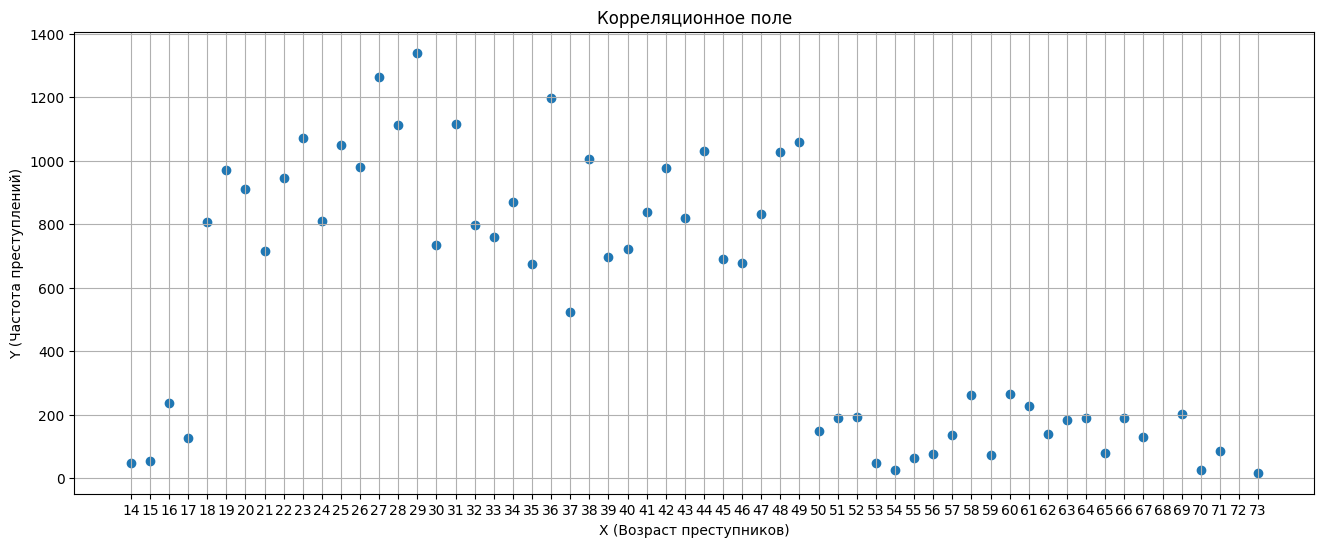

In [5]:
# Построение корреляционного поля
plt.figure(figsize=(16, 6))
plt.scatter(ages_unique, ages_frequency_only)

# Настройки графика
plt.title('Корреляционное поле')
plt.xlabel('X (Возраст преступников)')
plt.ylabel('Y (Частота преступлений)')
plt.grid(True)
plt.xticks(range(min(ages_unique), max(ages_unique) + 1, 1))

plt.show()

Задание №4. Исследовать совокупность данных на наличие нелинейной корреляционной зависимости. Для этого вычислить корреляционное отношение, взяв за основу группировку из лабораторной работы № 3.

In [7]:
# Разбиение данных на 7 равных групп
num_bins = 7
bins = np.linspace(start=np.min(ages), stop=77, num=num_bins + 1, dtype=int)
print(f'Интервалы 7-ми групп: {bins}')

# Вычисление частот для каждой группы
n_j, _ = np.histogram(ages, bins=bins)
print(f'Частоты групп: {n_j}')

# Проверка, что в группах все частоты
sum1 = 0
for i in range(len(n_j)):
    sum1 += n_j[i]
if sum1 == len(ages):
    print(f'Сумма частот групп равна {len(ages)}')

# Считаем групповые средние и дисперсии
x_j = []
d_j = []
for i in range(len(bins) - 1):
    leftBorder = bins[i]
    rightBorder = bins[i + 1]
    mean = 0
    sum_x2 = 0
    group_freq = 0
    for j in range(len(ages_unique)):
        age = list(ages_unique)[j]
        freq = list(ages_frequency_only)[j]
        if leftBorder <= age < rightBorder:
            mean += age * freq
            sum_x2 += (age ** 2) * freq
            group_freq += freq
    if group_freq > 0:
        x_j.append(mean/group_freq)
        d_j.append((sum_x2 / group_freq) - ((mean/group_freq) ** 2))
print(f'Групповые средние: {x_j}')
print(f'Групповые дисперсии: {d_j}')

# Считаем внутригрупповую дисперсию:
d_vngr = 0
for i in range(len(d_j)):
    a = d_j[i]
    b = list(ages_frequency_only)[i]
    d_vngr += d_j[i] * n_j[i] / len(ages)
print(len(ages))
print(f'Внутригрупповая дисперсия: {d_vngr}')

# Считаем межгрупповую дисперсию:
d_mejgr = 0
mean = 0
for i in range(len(x_j)):
    mean += x_j[i] * n_j[i] / len(ages)
print(mean)
for i in range(len(x_j)):
    d_mejgr += (x_j[i] - mean) ** 2 * n_j[i] / len(ages)
print(f'Межгрупповая дисперсия: {d_mejgr}')

# Общая дисперсия:
d_obsh = d_vngr + d_mejgr
print(f'Общая дисперсия: {d_obsh}')

# Корреляционное отношение
kor_n = math.sqrt(d_mejgr/d_obsh)
print(f"\nКорреляционное отношение: {kor_n}")

Интервалы 7-ми групп: [14 23 32 41 50 59 68 77]
Частоты групп: [4811 9476 7243 7951 1140 1472  330]
Сумма частот групп равна 32423
Групповые средние: [19.613385990438577, 27.06975517095821, 35.950158773988676, 45.088416551377186, 54.0640350877193, 62.82201086956522, 69.8]
Групповые дисперсии: [3.31883141596677, 6.382322903334398, 6.359382482039564, 7.123486751903101, 9.375724068944237, 5.991417695533983, 1.2933333333330665]
32423
Внутригрупповая дисперсия: 6.140089829516991
35.37300681614903
Межгрупповая дисперсия: 138.776878235298
Общая дисперсия: 144.916968064815

Корреляционное отношение: 0.9785858626416865
